In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [81]:
# loading the data from csv file to a pandas Dataframe
dataset = pd.read_csv('heart_disease_data.csv')
print(f"Dataset Size: {dataset.shape}")
dataset.head(10)



Dataset Size: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [82]:
dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [83]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [84]:
# separating the data and labels
X = dataset.drop(columns = 'target', axis=1)
Y = dataset['target']
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(f"Train data: {X_train.shape}, Test data: {X_test.shape}\n\n")
print(f"Train: \n {Y_train.value_counts()}\n")
print(f"Test : \n {Y_test.value_counts()}")

Train data: (242, 13), Test data: (61, 13)


Train: 
 target
1    135
0    107
Name: count, dtype: int64

Test : 
 target
0    31
1    30
Name: count, dtype: int64


# **Decision Tree**

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Model Training

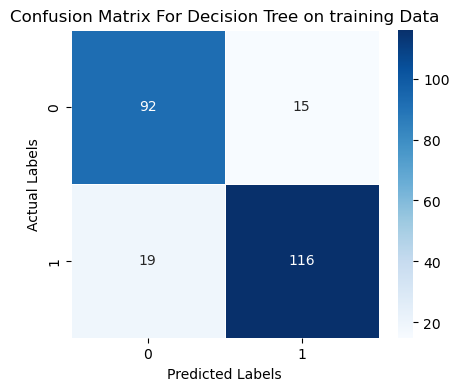

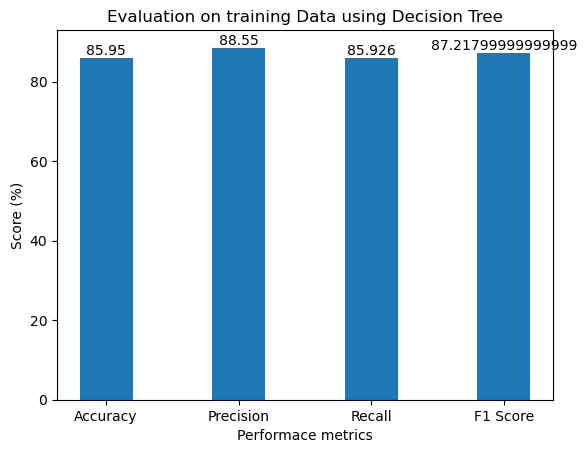

Accuracy: 85.95%
Precision: 88.55%
Recall: 85.926%
F1 Score: 87.21799999999999%


In [86]:
train_pred=dt.predict(X_train)

dt_a=round(accuracy_score(Y_train,train_pred),5)*100
dt_p=round(precision_score(Y_train,train_pred),5)*100
dt_r=round(recall_score(Y_train,train_pred),5)*100
dt_f1=round(f1_score(Y_train,train_pred),5)*100
cm = confusion_matrix(Y_train, train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For Decision Tree on training Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [dt_a, dt_p, dt_r,dt_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using Decision Tree")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {dt_a}%')
print(f'Precision: {dt_p}%')
print(f'Recall: {dt_r}%')
print(f'F1 Score: {dt_f1}%')

Model Testing

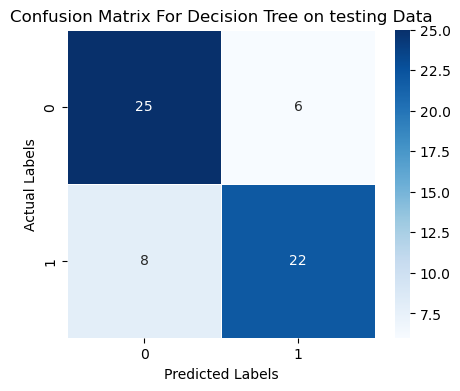

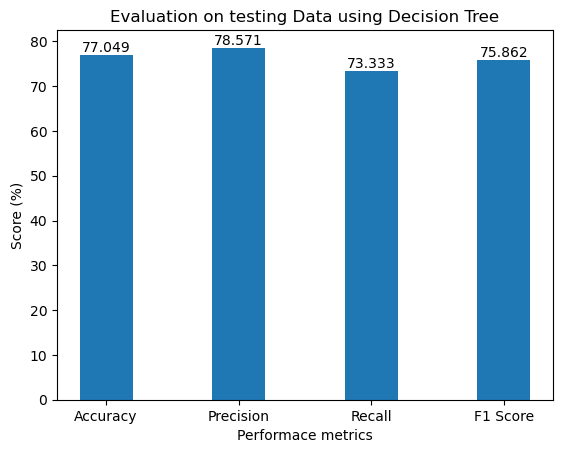

Accuracy: 77.049%
Precision: 78.571%
Recall: 73.333%
F1 Score: 75.862%


In [87]:
test_pred=dt.predict(X_test)


dt_a_t=round(accuracy_score(Y_test,test_pred),5)*100
dt_p_t=round(precision_score(Y_test,test_pred),5)*100
dt_r_t=round(recall_score(Y_test,test_pred),5)*100
dt_f1_t=round(f1_score(Y_test,test_pred),5)*100
cm = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For Decision Tree on testing Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [dt_a_t, dt_p_t, dt_r_t,dt_f1_t]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on testing Data using Decision Tree")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {dt_a_t}%')
print(f'Precision: {dt_p_t}%')
print(f'Recall: {dt_r_t}%')
print(f'F1 Score: {dt_f1_t}%')

# **MLP**

In [88]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(alpha=0.00001, max_iter=100)
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, max_iter=100)

Model Training

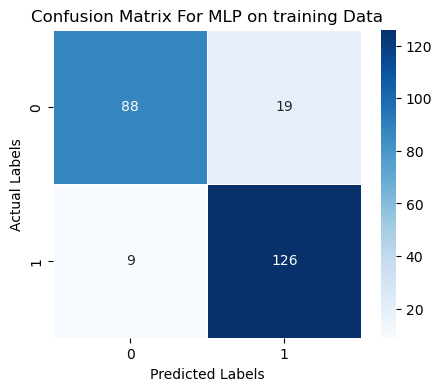

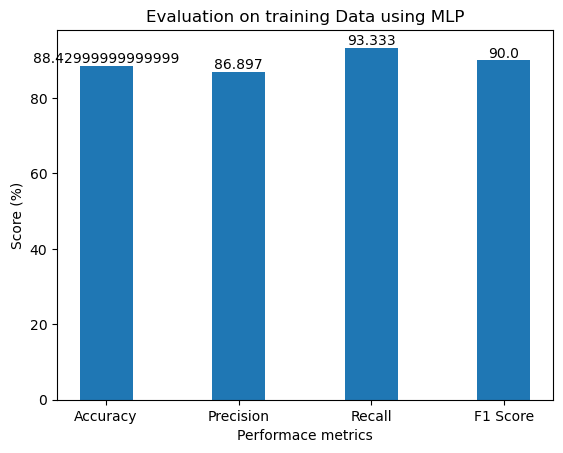

Accuracy: 88.42999999999999%
Precision: 86.897%
Recall: 93.333%
F1 Score: 90.0%


In [89]:
train_pred=mlp.predict(X_train)

mlp_a=round(accuracy_score(Y_train,train_pred),5)*100
mlp_p=round(precision_score(Y_train,train_pred),5)*100
mlp_r=round(recall_score(Y_train,train_pred),5)*100
mlp_f1=round(f1_score(Y_train,train_pred),5)*100
cm = confusion_matrix(Y_train, train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For MLP on training Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_a, mlp_p, mlp_r,mlp_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using MLP")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {mlp_a}%')
print(f'Precision: {mlp_p}%')
print(f'Recall: {mlp_r}%')
print(f'F1 Score: {mlp_f1}%')

Model Testing

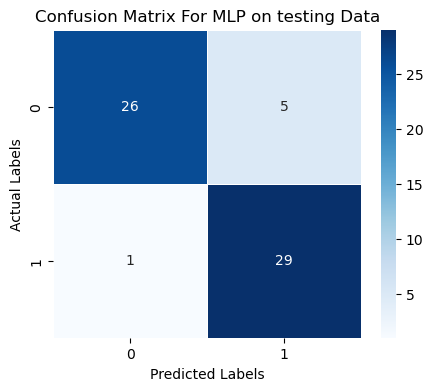

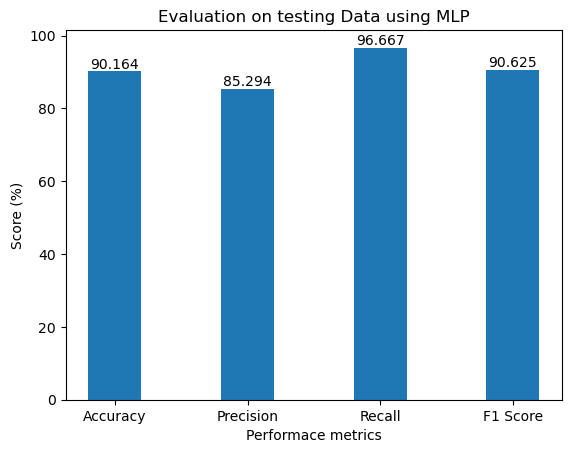

Accuracy: 90.164%
Precision: 85.294%
Recall: 96.667%
F1 Score: 90.625%


In [90]:
test_pred=mlp.predict(X_test)


mlp_a_t=round(accuracy_score(Y_test,test_pred),5)*100
mlp_p_t=round(precision_score(Y_test,test_pred),5)*100
mlp_r_t=round(recall_score(Y_test,test_pred),5)*100
mlp_f1_t=round(f1_score(Y_test,test_pred),5)*100
cm = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For MLP on testing Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_a_t, mlp_p_t, mlp_r_t,mlp_f1_t]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on testing Data using MLP")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {mlp_a_t}%')
print(f'Precision: {mlp_p_t}%')
print(f'Recall: {mlp_r_t}%')
print(f'F1 Score: {mlp_f1_t}%')

# **Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000, random_state=2)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=2)

Model Training

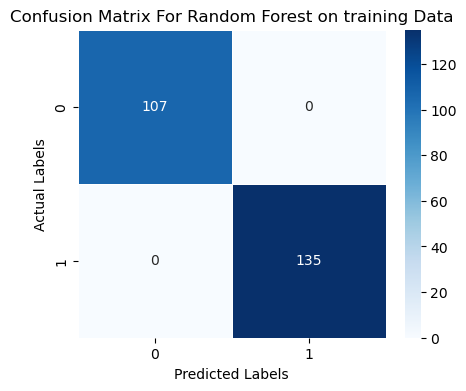

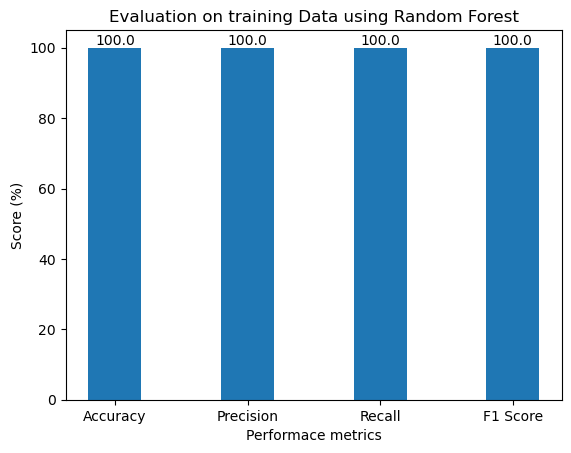

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


In [92]:
train_pred=rf.predict(X_train)

rf_a=round(accuracy_score(Y_train,train_pred),5)*100
rf_p=round(precision_score(Y_train,train_pred),5)*100
rf_r=round(recall_score(Y_train,train_pred),5)*100
rf_f1=round(f1_score(Y_train,train_pred),5)*100
cm = confusion_matrix(Y_train, train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For Random Forest on training Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [rf_a, rf_p, rf_r,rf_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using Random Forest")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {rf_a}%')
print(f'Precision: {rf_p}%')
print(f'Recall: {rf_r}%')
print(f'F1 Score: {rf_f1}%')

Model Testing

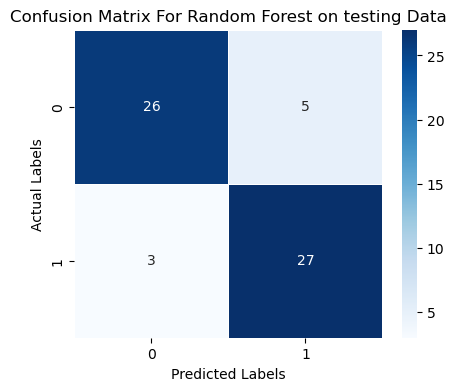

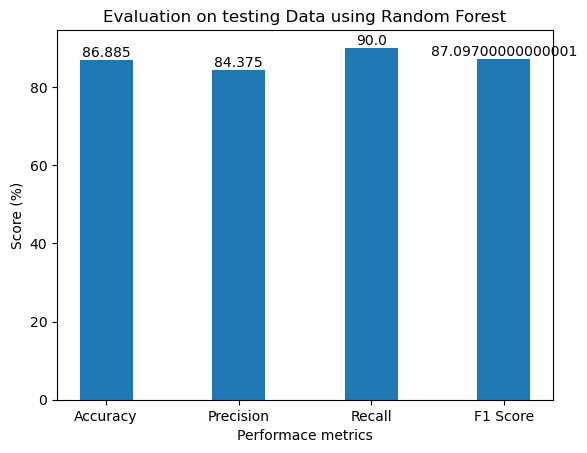

Accuracy: 86.885%
Precision: 84.375%
Recall: 90.0%
F1 Score: 87.09700000000001%


In [93]:
test_pred=rf.predict(X_test)


rf_a_t=round(accuracy_score(Y_test,test_pred),5)*100
rf_p_t=round(precision_score(Y_test,test_pred),5)*100
rf_r_t=round(recall_score(Y_test,test_pred),5)*100
rf_f1_t=round(f1_score(Y_test,test_pred),5)*100
cm = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For Random Forest on testing Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [rf_a_t, rf_p_t, rf_r_t,rf_f1_t]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on testing Data using Random Forest")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {rf_a_t}%')
print(f'Precision: {rf_p_t}%')
print(f'Recall: {rf_r_t}%')
print(f'F1 Score: {rf_f1_t}%')

# **Logistic Regression**

In [94]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1, max_iter=300)
lr.fit(X_train, Y_train)


LogisticRegression(max_iter=300, random_state=1)

Model Training

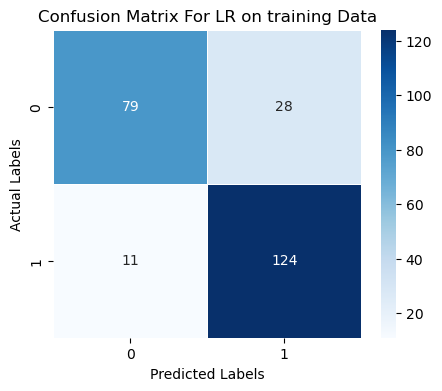

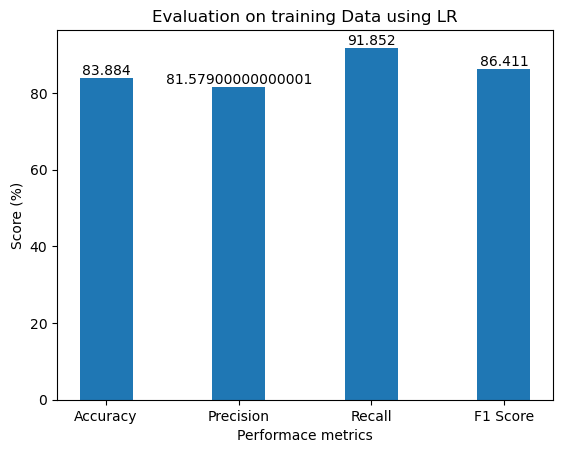

Accuracy: 83.884%
Precision: 81.57900000000001%
Recall: 91.852%
F1 Score: 86.411%


In [95]:
train_pred=lr.predict(X_train)

lr_a=round(accuracy_score(Y_train,train_pred),5)*100
lr_p=round(precision_score(Y_train,train_pred),5)*100
lr_r=round(recall_score(Y_train,train_pred),5)*100
lr_f1=round(f1_score(Y_train,train_pred),5)*100
cm = confusion_matrix(Y_train, train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For LR on training Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [lr_a, lr_p, lr_r,lr_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using LR")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {lr_a}%')
print(f'Precision: {lr_p}%')
print(f'Recall: {lr_r}%')
print(f'F1 Score: {lr_f1}%')

Model Testing

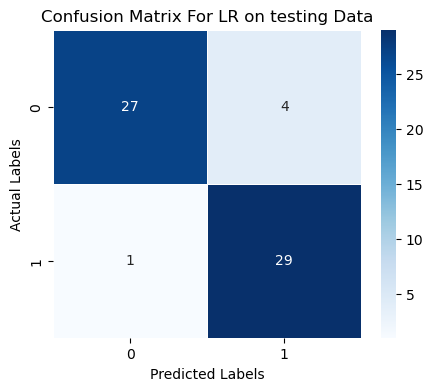

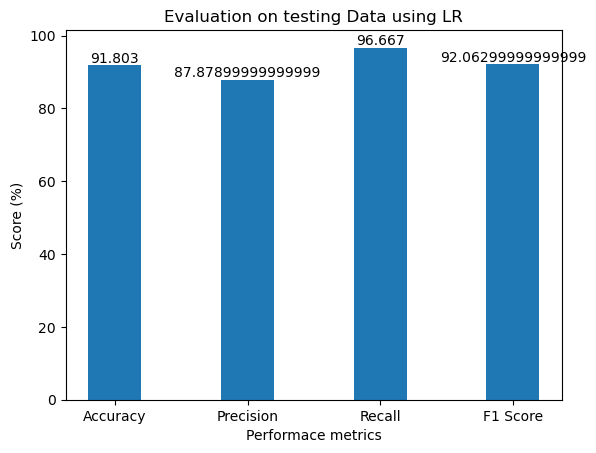

Accuracy: 91.803%
Precision: 87.87899999999999%
Recall: 96.667%
F1 Score: 92.06299999999999%


In [96]:
test_pred=lr.predict(X_test)


lr_a_t=round(accuracy_score(Y_test,test_pred),5)*100
lr_p_t=round(precision_score(Y_test,test_pred),5)*100
lr_r_t=round(recall_score(Y_test,test_pred),5)*100
lr_f1_t=round(f1_score(Y_test,test_pred),5)*100
cm = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For LR on testing Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [lr_a_t, lr_p_t, lr_r_t,lr_f1_t]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on testing Data using LR")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {lr_a_t}%')
print(f'Precision: {lr_p_t}%')
print(f'Recall: {lr_r_t}%')
print(f'F1 Score: {lr_f1_t}%')

# **Comperision Between MLP, LR, DT and RF**

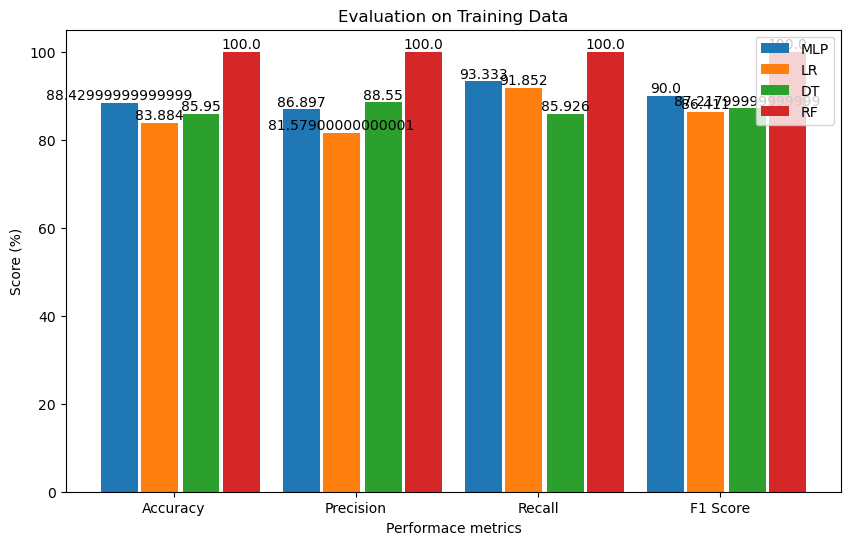

In [97]:
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_a, mlp_p, mlp_r, mlp_f1]
evl_lr = [lr_a, lr_p, lr_r, lr_f1]
evl_dt = [dt_a, dt_p, dt_r, dt_f1]
evl_rf = [rf_a, rf_p, rf_r, rf_f1]

X_axis = np.arange(len(X))
plt.figure(figsize=(10, 6))

mbr=plt.bar(X_axis - 0.3, evl_mpl, 0.2, label = 'MLP')
lbr=plt.bar(X_axis - 0.08, evl_lr, 0.2, label = 'LR')
sbr=plt.bar(X_axis + 0.15, evl_dt, 0.2, label = 'DT')
nbr=plt.bar(X_axis + 0.37, evl_rf, 0.2, label = 'RF')

br=[mbr,lbr,sbr,nbr]
for b in br:
    for bar in b:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
        str(height), ha='center', va='bottom')

plt.xticks(X_axis, X)
plt.title("Evaluation on Training Data")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.legend()
plt.show()

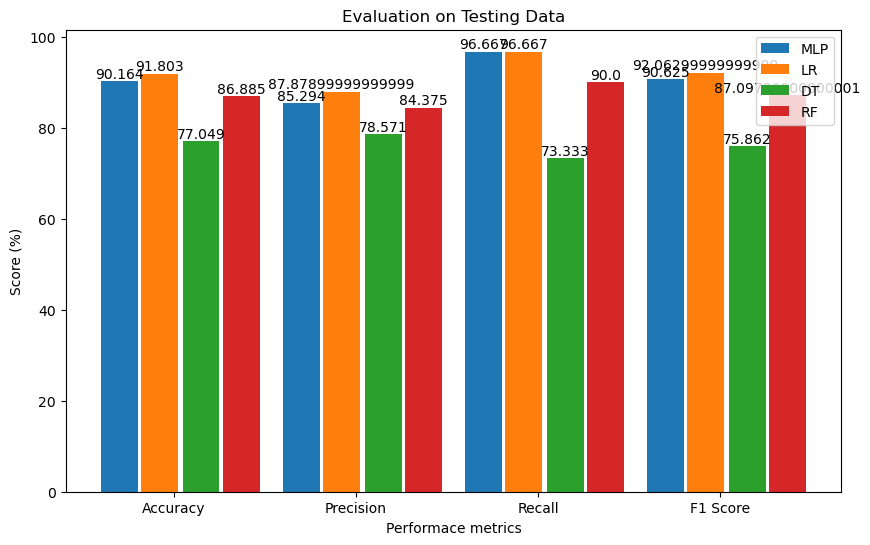

In [98]:
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_a_t, mlp_p_t, mlp_r_t, mlp_f1_t]
evl_lr = [lr_a_t, lr_p_t, lr_r_t, lr_f1_t]
evl_dt = [dt_a_t, dt_p_t, dt_r_t, dt_f1_t]
evl_rf = [rf_a_t, rf_p_t, rf_r_t, rf_f1_t]

X_axis = np.arange(len(X))
plt.figure(figsize=(10, 6))

mbr=plt.bar(X_axis - 0.3, evl_mpl, 0.2, label = 'MLP')
lbr=plt.bar(X_axis - 0.08, evl_lr, 0.2, label = 'LR')
sbr=plt.bar(X_axis + 0.15, evl_dt, 0.2, label = 'DT')
nbr=plt.bar(X_axis + 0.37, evl_rf, 0.2, label = 'RF')

br=[mbr,lbr,sbr,nbr]
for b in br:
    for bar in b:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
        str(height), ha='center', va='bottom')

plt.xticks(X_axis, X)
plt.title("Evaluation on Testing Data")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.legend()
plt.show()